# Анализ исходных данных

Исходные данные взяты отсюда: https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling

from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion

In [2]:
data = pd.read_csv('../data/raw/heart.csv')

In [3]:
# Размерность исходных данных
data.shape

(303, 14)

In [4]:
# Посмотрим на датафрейм
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
# Общее описание
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Статистики по столбцам
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Анализ отсутствующих значений
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Отчет по исходным данным

In [8]:
# Используем pandas_profiling для автоматизированного анализа исходных данных
data.profile_report(title='Pandas Profiling Report', progress_bar=False)

In [9]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target = 'target'

## Анализ pair plot

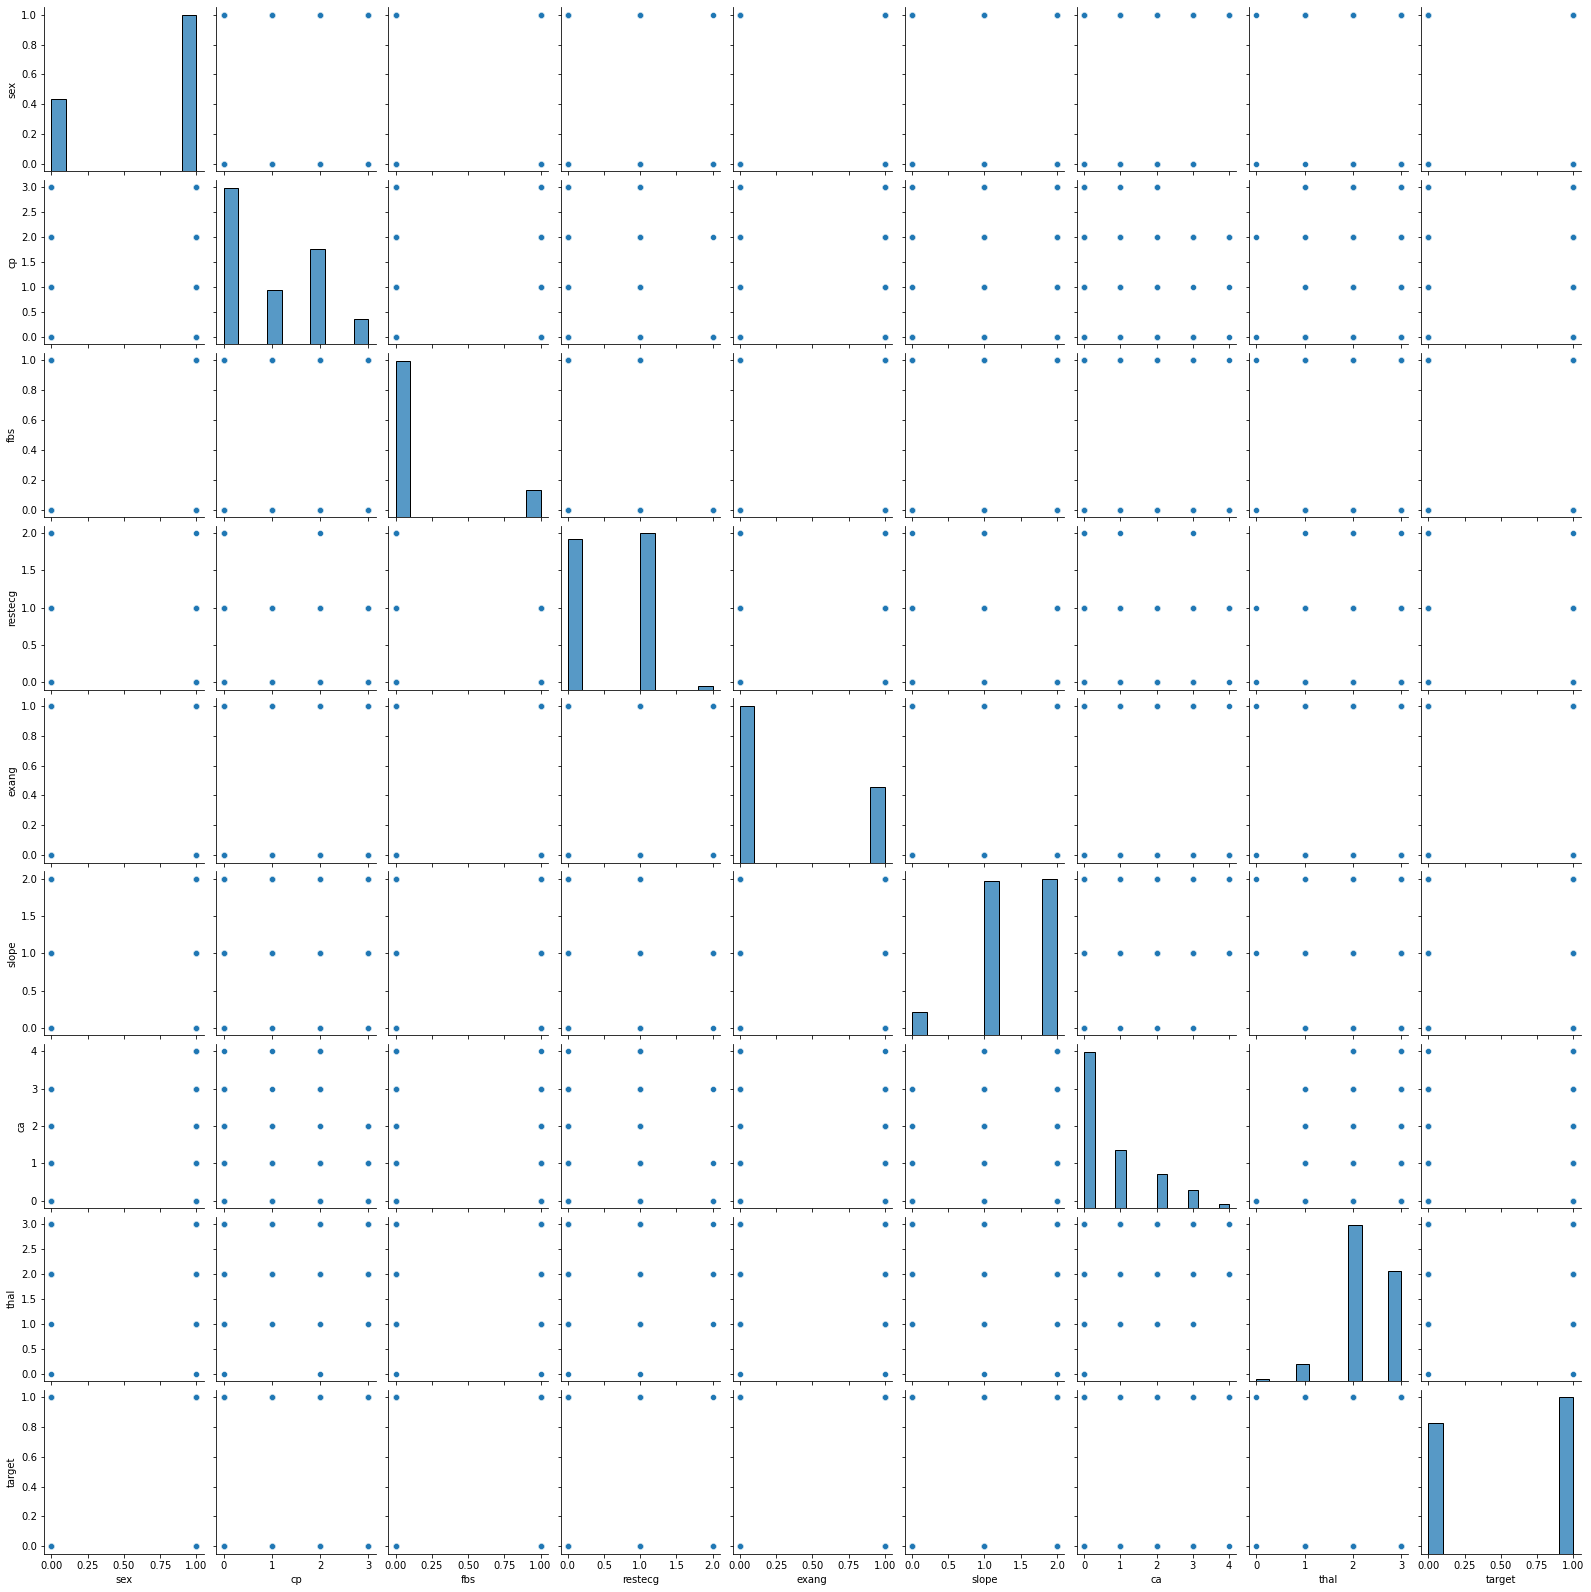

In [10]:
sns.pairplot(data[cat_features + [target]])

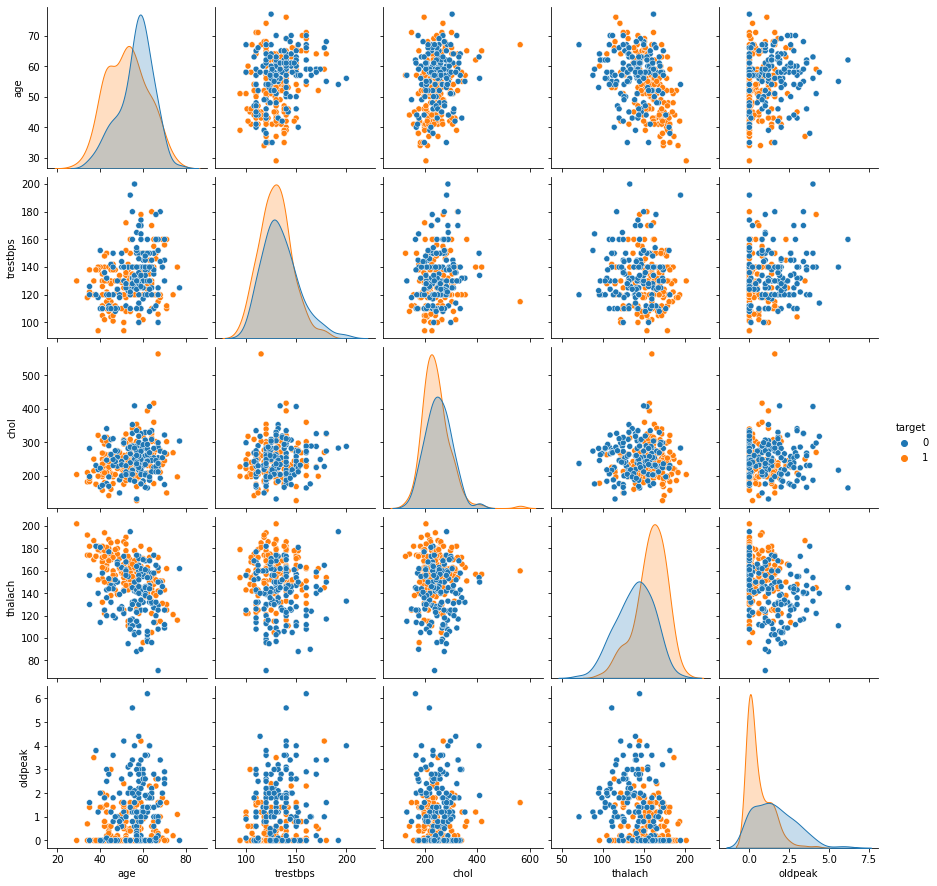

In [11]:
sns.pairplot(data[num_features + [target]], hue = target)

# Построение модели

## Константная модель

In [12]:
# Скор модели, которая предсказывает наиболее вероятный класс
const_score = metrics.accuracy_score(data[target], [1] * data.shape[0])
print('Точность константной модели:', const_score)

Точность константной модели: 0.5445544554455446


In [13]:
# Разбиваем данные обучающую и тестовую выборки
X = data[cat_features + num_features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

### Бейзлайн на базе логистической регрессии

In [14]:
# Признаки для логистической регрессии
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target = 'target'

In [15]:
clf = LogisticRegression(random_state = 42)
sc = MinMaxScaler()

In [16]:
# Пайплайн обработки числовых признаков
num_pipeline = Pipeline(
            [
                ("selection", FunctionTransformer(lambda x: x[num_features], validate=False)),
                ("scaler", sc),
            ])
# Пайплайн обработки категориальных признаков   
cat_pipeline = Pipeline(
            [
                ("selection", FunctionTransformer(lambda x: x[cat_features], validate=False)),
                ("ohe", OneHotEncoder(handle_unknown='ignore', sparse=False)),
            ])

In [17]:
# Общий пайплайн, объединяющий обработку признаков и классификатор
baseline = Pipeline(
    [
        ('feature_proc', FeatureUnion(
            transformer_list=[('num_proc', num_pipeline), ('cat_proc', cat_pipeline)])
        ),
        ('clf', clf)
    ])

In [18]:
baseline.fit(X_train, y_train)
print('Точность модели на обучающих данных: ', baseline.score(X_train, y_train))
print('Точность модели на тестовых  данных: ', baseline.score(X_test, y_test))

Точность модели на обучающих данных:  0.8677685950413223
Точность модели на тестовых  данных:  0.8688524590163934


In [19]:
print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## Модель на базе случайного леса

In [20]:
# Признаки для случайного леса
cat_features = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target = 'target'

In [21]:
clf = RandomForestClassifier(random_state = 42, n_estimators = 150)
sc = MinMaxScaler()

In [22]:
# Пайплайн обработки числовых признаков
num_pipeline = Pipeline(
            [
                ("selection", FunctionTransformer(lambda x: x[num_features], validate=False)),
                ("scaler", sc),
            ])
# Пайплайн обработки категориальных признаков   
cat_pipeline = Pipeline(
            [
                ("selection", FunctionTransformer(lambda x: x[cat_features], validate=False)),
                ("ohe", OneHotEncoder(handle_unknown='ignore', sparse=False)),
            ])

In [23]:
# Общий пайплайн, объединяющий обработку признаков и классификатор
ml_model = Pipeline(
    [
        ('feature_proc', FeatureUnion(
            transformer_list=[('num_proc', num_pipeline), ('cat_proc', cat_pipeline)])
        ),
        ('clf', clf)
    ])

In [24]:
ml_model.fit(X_train, y_train)
print('Точность модели на обучающих данных: ', ml_model.score(X_train, y_train))
print('Точность модели на тестовых  данных: ', ml_model.score(X_test, y_test))

Точность модели на обучающих данных:  1.0
Точность модели на тестовых  данных:  0.9016393442622951


In [25]:
print(classification_report(y_test, ml_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.88      0.94      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

